<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [334]:
##### Your Code Here #####
# fit 2 model, regression and an image
# normalize data no need for activation for last layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split

In [335]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [336]:
df = pd.DataFrame((x_train, y_train))
df.head()

,0
0,"[[1.23247, 0.0, 8.14, 0.0, 0.538, 6.142, 91.7,..."
1,"[15.2, 42.3, 50.0, 21.1, 17.7, 18.5, 11.3, 15...."


In [373]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [374]:
boston1 = pd.DataFrame(boston.data)
boston1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [375]:
boston1.columns = boston.feature_names
boston1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [376]:
boston1['PRICE'] = boston.target
boston1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [377]:
# splitting data into X and y

X = boston1.drop('PRICE', axis=1)

In [378]:
y = boston1['PRICE']
X.shape, y.shape

((506, 13), (506,))

In [379]:
# X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

In [380]:
#  splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [381]:
X_train.shape, y_train.shape

((339, 13), (339,))

In [382]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

In [383]:
X_train = norm.fit_transform(X_train)
# y_train = norm.fit_transform(y_train)

In [384]:
model = Sequential()

In [385]:
model.add(Dense(13, input_dim=13, activation='relu', name='Dense'))
model.add(Dense(26, activation='sigmoid'))
model.add(Dense(15, activation='relu'))
model.add(Dense(7, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [386]:
# model.add(Dense(1, input_dim=8, activation="sigmoid")) #Relu is valid option. 

In [387]:
model.compile(loss='mae', optimizer='nadam', metrics=['MSE'])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_124 (Dense)            (None, 26)                364       
_________________________________________________________________
dense_125 (Dense)            (None, 15)                405       
_________________________________________________________________
dense_126 (Dense)            (None, 7)                 112       
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 8         
Total params: 1,071
Trainable params: 1,071
Non-trainable params: 0
_________________________________________________________________


In [388]:
model.fit(X_train, y_train, epochs=140)

Train on 339 samples
Epoch 1/140
339/339 [==============================] - 1s 3ms/sample - loss: 22.4552 - MSE: 592.3795
Epoch 2/140
339/339 [==============================] - 0s 74us/sample - loss: 22.4025 - MSE: 590.0137
Epoch 3/140
339/339 [==============================] - 0s 82us/sample - loss: 22.3469 - MSE: 587.5545
Epoch 4/140
339/339 [==============================] - 0s 79us/sample - loss: 22.2955 - MSE: 585.2293
Epoch 5/140
339/339 [==============================] - 0s 74us/sample - loss: 22.2529 - MSE: 583.3076
Epoch 6/140
339/339 [==============================] - 0s 77us/sample - loss: 22.2177 - MSE: 581.7603
Epoch 7/140
339/339 [==============================] - 0s 81us/sample - loss: 22.1888 - MSE: 580.4866
Epoch 8/140
339/339 [==============================] - 0s 85us/sample - loss: 22.1660 - MSE: 579.4767
Epoch 9/140
339/339 [==============================] - 0s 96us/sample - loss: 22.1479 - MSE: 578.6716
Epoch 10/140
339/339 [==============================] - 0s 94u

In [389]:
scores = model.evaluate(X_test, y_test)
print(f"{model.metrics_names[1]}: {scores[1]}")

167/167 [==============================] - 0s 660us/sample - loss: 20.6500 - MSE: 502.1028
MSE: 502.1028137207031


In [390]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=False)

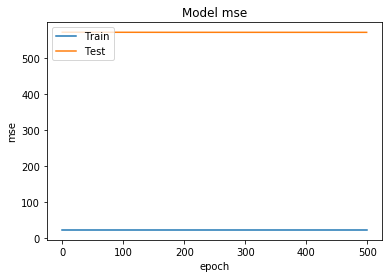

KeyError: 'metrics'

In [397]:
import matplotlib.pyplot as plt
#plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['MSE'])

# plt.plot(fit.history['val_loss'])
plt.title("Model mse")
plt.xlabel("epoch")
plt.ylabel('mse')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training & validation loss values

plt.plot(history.history['metrics'])
plt.plot(history.history['MSE'])

# plt.plot(fit.history['val_loss'])
plt.title("Model mse")
plt.xlabel("epoch")
plt.ylabel('mse')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [332]:
model1 =Sequential()
model1.add(Dense(13, input_dim=13, activation='relu', name='Dense'))
model1.add(Dense(26, activation='relu'))
model1.add(Dense(15, activation='relu'))
model1.add(Dense(7, activation='relu'))
model1.add(Dense(1, activation='relu'))
model1.add(Dense(7, activation='relu'))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(1, activation='relu'))
model1.compile(loss='mae', optimizer='nadam', metrics=['MSE'])
model1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_105 (Dense)            (None, 26)                364       
_________________________________________________________________
dense_106 (Dense)            (None, 15)                405       
_________________________________________________________________
dense_107 (Dense)            (None, 7)                 112       
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 8         
_________________________________________________________________
dense_109 (Dense)            (None, 7)                 14        
_________________________________________________________________
dense_110 (Dense)            (None, 5)               

In [333]:
model1.fit(X_train, y_train, epochs=80)

ValueError: Error when checking input: expected Dense_input to have shape (13,) but got array with shape (784,)

In [279]:
scores = model1.evaluate(X_test, y_test)
print(f"{model1.metrics_names[1]}: {scores[1]}")

167/167 [==============================] - 0s 714us/sample - loss: 333.8532 - MSE: 544.1288
MSE: 544.1287841796875


In [280]:
model2 =Sequential()
model2.add(Dense(130, input_dim=13, activation='relu', name='Dense'))
model2.add(Dense(260, activation='relu'))
model2.add(Dense(150, activation='relu'))
model2.add(Dense(75, activation='relu'))
model2.add(Dense(19, activation='relu'))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['MSE'])
model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                (None, 130)               1820      
_________________________________________________________________
dense_88 (Dense)             (None, 260)               34060     
_________________________________________________________________
dense_89 (Dense)             (None, 150)               39150     
_________________________________________________________________
dense_90 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_91 (Dense)             (None, 19)                1444      
_________________________________________________________________
dense_92 (Dense)             (None, 7)                 140       
_________________________________________________________________
dense_93 (Dense)             (None, 5)               

In [284]:
%time
model2.fit(X_train, y_train, epochs=80)

CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 11.9 µs
Train on 339 samples
Epoch 1/80
339/339 [==============================] - 0s 104us/sample - loss: -335.0379 - MSE: 421.6404
Epoch 2/80
339/339 [==============================] - 0s 85us/sample - loss: -335.0379 - MSE: 421.6404
Epoch 3/80
339/339 [==============================] - 0s 78us/sample - loss: -335.0379 - MSE: 421.6404
Epoch 4/80
339/339 [==============================] - 0s 81us/sample - loss: -335.0379 - MSE: 421.6404
Epoch 5/80
339/339 [==============================] - 0s 82us/sample - loss: -335.0379 - MSE: 421.6404
Epoch 6/80
339/339 [==============================] - 0s 82us/sample - loss: -335.0379 - MSE: 421.6404
Epoch 7/80
339/339 [==============================] - 0s 82us/sample - loss: -335.0379 - MSE: 421.6403
Epoch 8/80
339/339 [==============================] - 0s 74us/sample - loss: -335.0379 - MSE: 421.6404
Epoch 9/80
339/339 [==============================] - 0s 79us/sample - loss: -335.0379 - M

In [285]:
scores = model2.evaluate(X_test, y_test)
print(f"{model2.metrics_names[1]}: {scores[1]}")

167/167 [==============================] - 0s 63us/sample - loss: -314.8009 - MSE: 4444057.5000
MSE: 4444057.5


In [286]:
fit = model.fit(X_train, y_train, epochs=300, validation_split=.1, verbose=False)
history = model.fit(X_train, y_train, epochs=100, verbose=False)

In [287]:
scores = model.evaluate(X_test, y_test)

167/167 [==============================] - 0s 53us/sample - loss: -741.5163 - MSE: 501.8414


In [288]:
print(f'{model.metrics_names[1]}: {scores[1]}')

MSE: 501.84136962890625


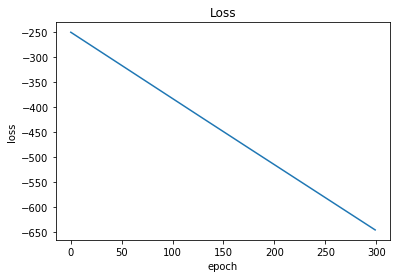

In [289]:
import matplotlib.pyplot as plt

# plt.plot(fit.history['mse'])
# plt.plot(fit.history['val_mse'])
plt.plot(fit.history['loss'])
# plt.plot(fit.history['val_loss'])
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel('loss')
plt.show()

In [ ]:
# so cranking the density way high or the poisson optimizer did do well. ! after little testing 
# it was the optimzer poisson that sucked but cranking the numbers helped

In [297]:
# I will run a linear regression model to compare
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [311]:

# simpler linear regression model
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# linreg = LinearRegression()
# linreg.fit(X_train, y_train)
# linreg_pred = linreg.predict(X_test)
# mean_squared_error(linreg_pred, y_test)

140199499.60049394

In [308]:
model3 = LinearRegression()
    
# Fit on train, score on val

model3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [309]:
y_pred = model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [310]:
print(f'Test Error: {mse:.2f} ')

Test Error: 140199499.60 


In [301]:
import category_encoders as ce

In [307]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
#### Your Code Here ####
# image classification 
# bonus lecture 3 on how to load
# hotencode

In [320]:
### Let's do it!

from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Stretch - use dropout 
import numpy as np

In [321]:
# import matplotlib.pyplot as plt
# plt.imshow(x_train[0])
# plt.show()

In [328]:
# batch_size = 64
num_classes = 10
# epochs = 20

In [329]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [330]:
# reshape data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# X variable type

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# correct encoding for y

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_train, num_classes)

In [331]:
fashion_mnist_model = Sequential()

# input => Hidden
fashion_mnist_model.add(Dense(16, input_dim = 784, activation = 'relu'))
# hidden
fashion_mnist_model.add(Dense(16, activation = 'relu'))
# hidden
fashion_mnist_model.add(Dense(16, activation = 'relu'))
# hidden
fashion_mnist_model.add(Dense(16, activation = 'relu'))
# output
fashion_mnist_model.add(Dense(1, activation = 'softmax'))
# compile
fashion_mnist_model.compile(loss='categorical_crossentropy',
                           optimizer= 'adam',
                           metrics= ['accuracy'])
# summary
fashion_mnist_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 16)                12560     
_________________________________________________________________
dense_101 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_102 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_103 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 17        
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [327]:
hist = fashion_mnist_model.fit(X_train, y_train, batch_size=100, epochs=20, verbose=False)
scores = fashion_mnist_model.evaluate(X_test, y_test)

ValueError: You are passing a target array of shape (60000, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.